In [24]:
# imports

import torch
import numpy as np 
import matplotlib.pyplot as plt
import torch.nn as nn

### Play around

In [60]:
# training patterns
X = torch.tensor([[1, 1], [0, 1], [3, 4], [2, 2], [2, -2], [-2, -3]], dtype=torch.float)
D = torch.tensor([0,0,1,1,2,2], dtype=torch.long)

K = torch.tensor([[1,0,0], [1,0,0], [0,1,0], [0,1,0], [0,0,1], [0,0,1]])

# weights and biases
W = torch.tensor([[-0.1, 0.97, 0.18], [-0.7, 0.38, 0.93]], dtype=torch.float)
b = torch.tensor([[0,0,0]], dtype=torch.float)

V = torch.tensor([[1.01, 0.09, -0.39], [0.79, -0.45, -0.22], [0.28, 0.96, -0.07]], dtype=torch.float)
c = torch.tensor([[0,0,0]], dtype=torch.float)

# one iteration
# forward propagation
Z = torch.matmul(X, W)+b
H = torch.sigmoid(Z)

U = torch.matmul(H, V)+c
fU = torch.softmax(U, 1)

Y = torch.argmax(fU,1)

# gradients
DUJ = -(K-fU)
DZJ = torch.matmul(DUJ,V)*H*(1-H)

# backward propagation
V = V-0.1*torch.matmul(H.T,DUJ)
c = c-0.1*torch.sum(DUJ, dim=0)
W = W-0.1*torch.matmul(X.T,DZJ)
b = b-0.1*torch.sum(DZJ, dim=0)

print("V: ", V)
print("c: ", c)
print("W: ", W)
print("b: ", b)



V:  tensor([[ 0.9154,  0.0511, -0.2565],
        [ 0.6815, -0.3685, -0.1929],
        [ 0.2204,  1.0455, -0.0959]])
c:  tensor([[-0.1598,  0.0408,  0.1191]])
W:  tensor([[-0.1116,  0.9866,  0.1860],
        [-0.6595,  0.3315,  0.9177]])
b:  tensor([[-0.0094,  0.0172,  0.0019]])


### Actual training

In [103]:
# parameters

# training patterns
X = torch.tensor([[1, 1], [0, 1], [3, 4], [2, 2], [2, -2], [-2, -3]], dtype=torch.float)
D = torch.tensor([0,0,1,1,2,2], dtype=torch.long)

K = torch.tensor([[1,0,0], [1,0,0], [0,1,0], [0,1,0], [0,0,1], [0,0,1]])

# weights and biases
W_init = torch.tensor([[-0.1, 0.97, 0.18], [-0.7, 0.38, 0.93]], dtype=torch.float)
b_init = torch.tensor([[0,0,0]], dtype=torch.float)

V_init = torch.tensor([[1.01, 0.09, -0.39], [0.79, -0.45, -0.22], [0.28, 0.96, -0.07]], dtype=torch.float)
c_init = torch.tensor([[0,0,0]], dtype=torch.float)


In [104]:
# class for the network

class twoLayerNN():
    def __init__(self):
        self.W = W_init
        self.b = b_init
        self.V = V_init
        self.c = c_init

    def __call__(self, X):
        Z = torch.matmul(X,self.W)+self.b
        H = torch.sigmoid(Z)
        U = torch.matmul(H,self.V)+self.c
        fU = torch.softmax(U, 1)
        Y = torch.argmax(fU, 1)
        return Z, H, U, fU, Y


In [105]:
# loss function

def loss_fn(U, target_d):
    cross_loss = nn.CrossEntropyLoss()
    return cross_loss(U, target_d)

In [106]:
# function training the network

def train(model, X, K, lr):
    # forward propagation
    Z, H, U, fU, Y = model(X)
    
    # gradients
    DUJ = -(K-fU)
    DZJ = torch.matmul(DUJ, model.V)*H*(1-H)

    # backward propagation
    model.V = model.V-lr*torch.matmul(H.T, DUJ)
    model.c = model.c-lr*torch.sum(DUJ, dim=0)
    model.W = model.W-lr*torch.matmul(X.T, DZJ)
    model.b = model.b-lr*torch.sum(DZJ, dim=0)

    return model.V, model.c, model.W, model.b


In [107]:
# set parameters

lr = 0.05
no_epochs = 2000
err = []

model = twoLayerNN()

for epoch in range(no_epochs):
    Z, H, U, fU, Y = model(X)
    loss_ = loss_fn(U,D)
    V, c, W, b = train(model, X, K, lr)

    err.append(loss_.item())

    if epoch%100==99:
        print(loss_.item())


0.42978277802467346
0.27949345111846924
0.16326142847537994
0.1033998429775238
0.07173749804496765
0.05331667885184288
0.04169181361794472
0.03386203944683075
0.02830837108194828
0.024202927947044373
0.021065078675746918
0.018600229173898697
0.016619928181171417
0.014998339116573334
0.01364880334585905
0.012510128319263458
0.011537816375494003
0.010698738507926464
0.009968064725399017
0.00932641327381134


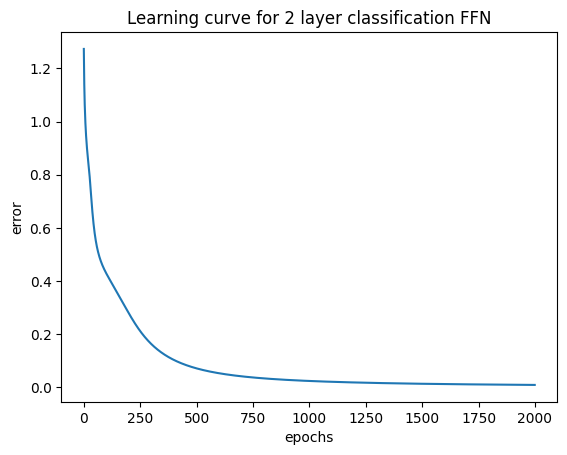

In [108]:
# plot learning curve

plt.plot(range(no_epochs), err)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("Learning curve for 2 layer classification FFN")
plt.show()

In [109]:
# final weights and biases

print("V: ", V)
print("c: ", c)
print("W: ", W)
print("b: ", b)

V:  tensor([[ 5.2476, -6.7701,  2.2325],
        [-2.2342, -1.2258,  3.5800],
        [ 1.6006,  4.0371, -4.4677]])
c:  tensor([[-1.8278,  1.1241,  0.7036]])
W:  tensor([[-2.5554, -0.1789,  0.0541],
        [-0.7120, -3.1324,  2.5770]])
b:  tensor([[ 4.5068, -1.4092,  0.6162]])


In [111]:
# one iteration
# forward propagation
Z = torch.matmul(X, W)+b
H = torch.sigmoid(Z)

U = torch.matmul(H, V)+c
fU = torch.softmax(U, 1)

Y = torch.argmax(fU,1)

loss_ = loss_fn(U,D)
print(loss_.item())

print(Y)
print(D)

0.009320410899817944
tensor([0, 0, 1, 1, 2, 2])
tensor([0, 0, 1, 1, 2, 2])
